In [7]:
import sys
sys.path.append('/home/chris/repos/financial_analysis/')
import pandas as pd

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
from credentials import *
api_key = key

In [12]:
assets = [
    '^GDAXI',#DAX
    '^GSPC', #S&P 500
    '^DJI',  #DowJones 30
    #'^IXIC', #NASDAQ
    '^NYA', #NYSE COMPOSITE (DJ)
    '^XAX',  #NYSE AMEX COMPOSITE INDEX
    #'^BATSK',#BATS 1000 Index
    '^RUT',  #Russell 2000
    '^FTSE', #FTSE 100
    '^FCHI', #CAC 40
    '^STOXX50E', #STOXX 50
    '^N100', #EURONEXT 100
    '^BFX',  #BEL 20 Brussels
    '^N225', #Nikkei
    '^HSI',  #Hangseng   
    'EOAN.DE'
]



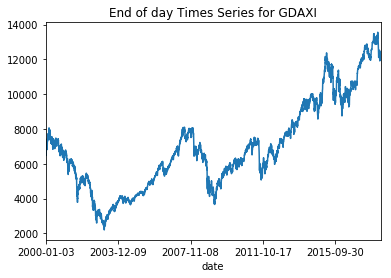

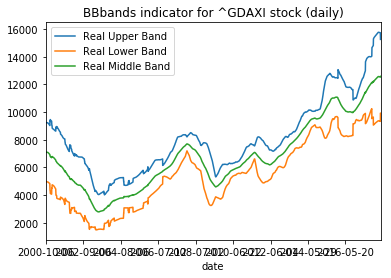

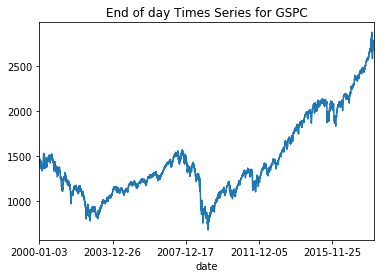

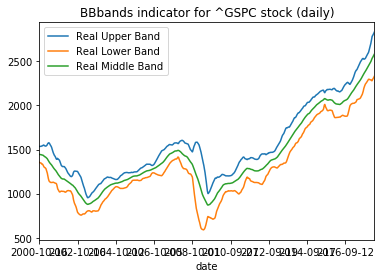

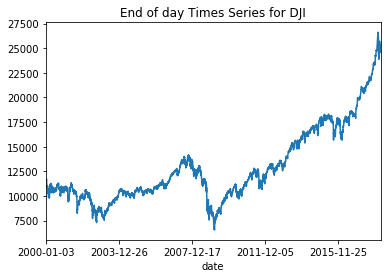

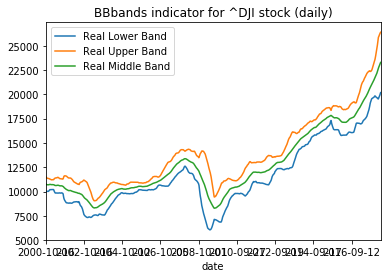

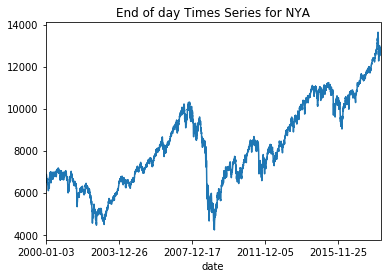

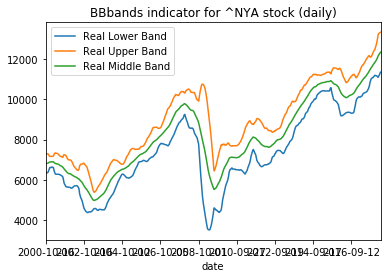

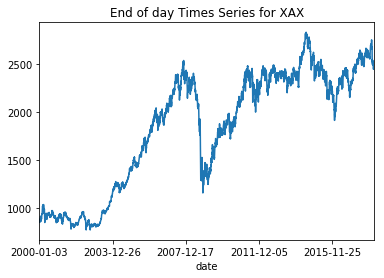

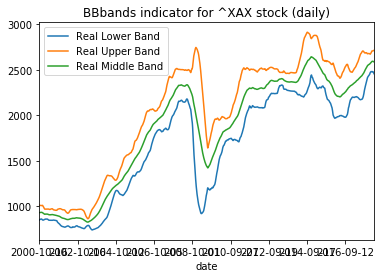

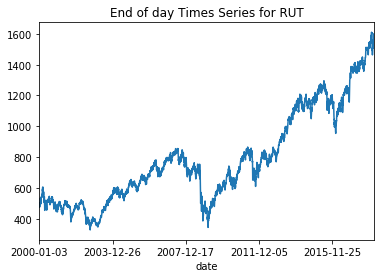

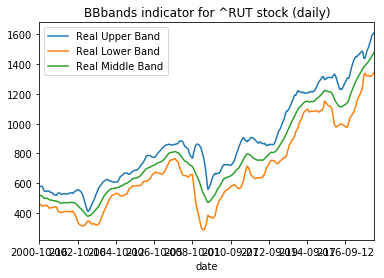

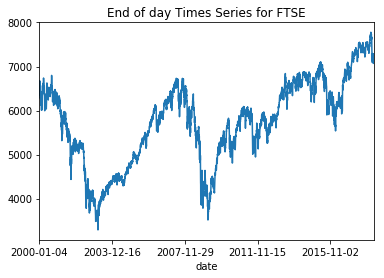

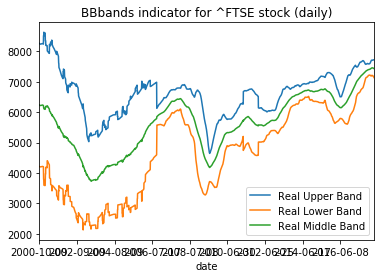

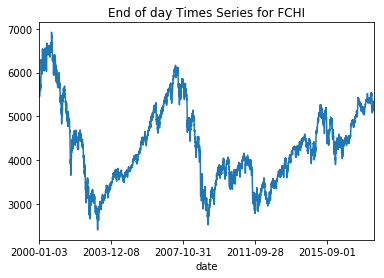

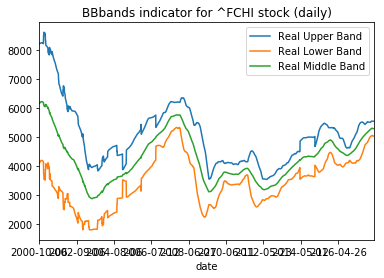

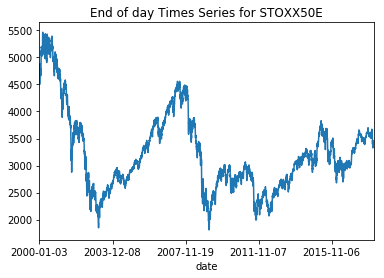

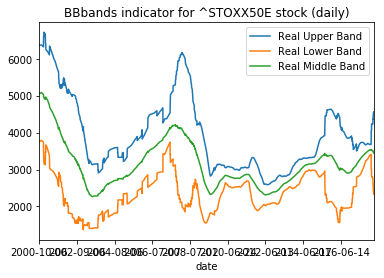

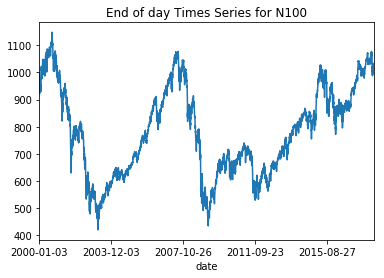

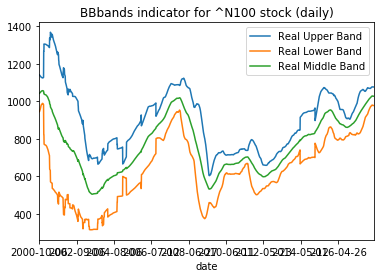

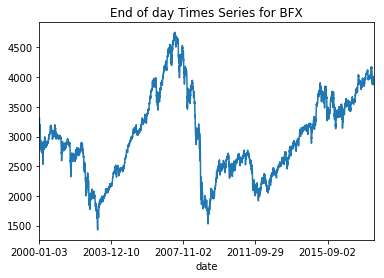

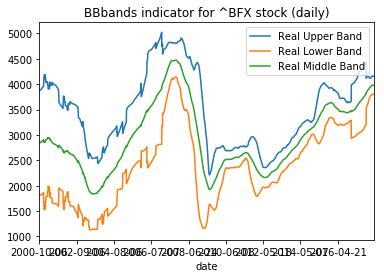

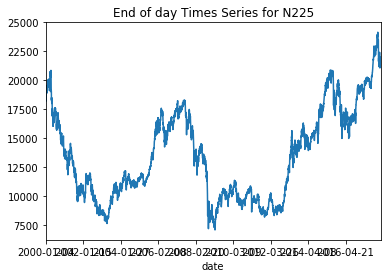

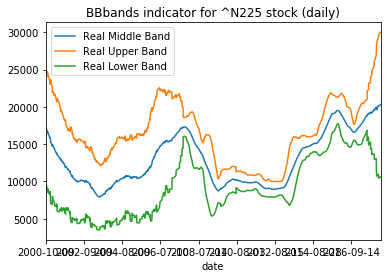

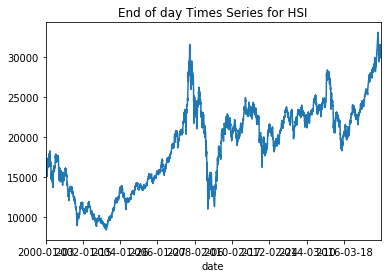

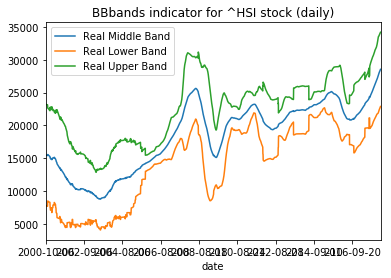

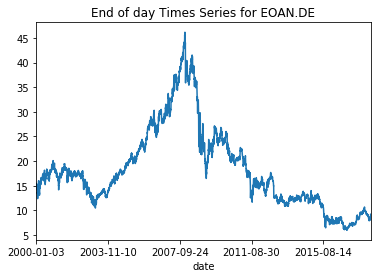

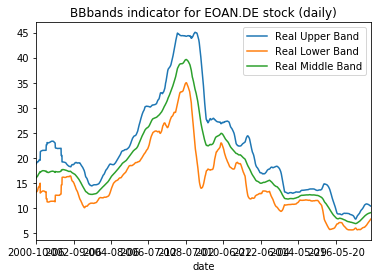

In [39]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
df_price = pd.DataFrame()
df_bbands = pd.DataFrame()


for asset in assets:
    ts = TimeSeries(key=api_key, output_format='pandas')
    data, meta_data = ts.get_daily(symbol=asset, outputsize='full')
    data = data.drop('5. volume',axis=1)
    data = data.drop(data.loc[(data==0).any(axis=1)].index)  
    df_price['close_'+asset.strip('^')] = data['4. close']
    data['4. close'].plot()
    plt.title('End of day Times Series for ' + asset.strip('^') )
    plt.show()
    #Read BBand technical indicator
    ti = TechIndicators(key=key, output_format='pandas')
    data, meta_data = ti.get_bbands(symbol=asset, interval='daily', time_period=200)
    df_bbands[data.columns[0] + ' ' + asset.strip('^')] = data[data.columns[0]]
    df_bbands[data.columns[1] + ' ' + asset.strip('^')] = data[data.columns[1]]
    df_bbands[data.columns[2] + ' ' + asset.strip('^')] = data[data.columns[2]]
    data.plot()
    plt.title('BBbands indicator for ' +  asset.strip('^') + ' stock (daily)')
    plt.show()

In [40]:
df_bbands

,Real Upper BandGDAXI,Real Lower BandGDAXI,Real Middle BandGDAXI,Real Upper BandGSPC,Real Lower BandGSPC,Real Middle BandGSPC,Real Lower BandDJI,Real Upper BandDJI,Real Middle BandDJI,Real Lower BandNYA,...,Real Middle BandBFX,Real Middle BandN225,Real Upper BandN225,Real Lower BandN225,Real Middle BandHSI,Real Lower BandHSI,Real Upper BandHSI,Real Upper BandEOAN.DE,Real Lower BandEOAN.DE,Real Middle BandEOAN.DE
date,,,,,,,,,,,,,,,,,,,,,
2000-10-06,9243.3968,4990.5739,7116.9853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2853.9609,NaN,NaN,NaN,15477.4165,7739.9125,23214.9206,18.8204,13.2069,16.0137
2000-10-09,9243.3108,4989.9600,7116.6354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2852.4407,17063.2561,25069.0630,9057.4492,15469.0359,7736.1184,23201.9533,18.8443,13.2171,16.0307
2000-10-10,9243.3472,4990.7857,7117.0664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2851.6411,17047.3804,25050.3315,9044.4293,15461.4423,7731.8574,23191.0273,18.8663,13.2325,16.0494
2000-10-11,9243.3170,4991.4115,7117.3642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2851.3827,17032.2355,25035.2755,9029.1955,15457.8437,7728.3094,23187.3780,18.8937,13.2427,16.0682
2000-10-12,9243.3275,4991.3044,7117.3159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2851.0190,17019.1473,25023.2747,9015.0199,15457.4516,7727.8475,23187.0556,18.9188,13.2518,16.0853
2000-10-13,9243.1748,4990.2605,7116.7176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2850.3834,17004.8318,25010.7485,8998.9152,15453.8259,7723.4479,23184.2040,18.9439,13.2598,16.1019
2000-10-16,9242.6359,4987.8167,7115.2263,1534.7379,1354.8286,1444.7832,10021.0509,11504.5728,10762.8118,6329.9459,...,2849.5565,17082.3934,24719.9260,9444.8609,15449.4522,7718.9816,23179.9227,18.9696,13.2638,16.1167
2000-10-17,9242.1994,4984.6578,7113.4286,1535.1874,1353.3266,1444.2570,10013.4812,11499.4644,10756.4728,6328.9934,...,2848.8428,17064.8399,24702.1707,9427.5092,15444.5088,7713.8357,23175.1820,18.9952,13.2649,16.1301
2000-10-18,9241.7233,4980.8358,7111.2795,1535.8205,1352.1206,1443.9705,10001.0389,11501.6777,10751.3583,6329.9529,...,2848.3310,17045.8152,24685.9391,9405.6913,15438.2304,7706.4041,23170.0568,19.0205,13.2658,16.1431


In [ ]:
def predictive_model(test_X)
    for neuron_number in np.linspace(20,1000,50)
        # design network
        model = Sequential()
        model.add(LSTM(neuron_number, input_shape=(train_X.shape[1], train_X.shape[2])))
        model.add(Dense(1))
        #model.add(Dense(1, activation='tanh'))
        model.compile(loss='mae', optimizer='adam')
        # fit network
        history = model.fit(train_X, train_y, epochs=200, batch_size=40, validation_data=(test_X, test_y), verbose=2, shuffle=True)
        # plot history
        pyplot.plot(history.history['loss'], label='train')
        pyplot.plot(history.history['val_loss'], label='test')
        pyplot.legend()
        pyplot.show()
        yhat = model.predict(test_X)

In [35]:
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt


    ti = TechIndicators(key=key, output_format='pandas')
    data, meta_data = ti.get_bbands(symbol='MSFT', interval='daily', time_period=200)
    data.plot()
    plt.title('BBbands indicator for  MSFT stock (daily)')
    plt.show()

IndentationError: unexpected indent (<ipython-input-35-6d9a6c3aa311>, line 5)

In [38]:
data.columns[0]

'Real Lower Band'

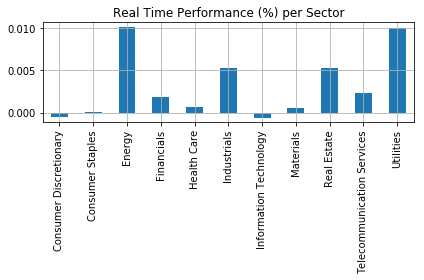

In [14]:
from alpha_vantage.sectorperformance import SectorPerformances
import matplotlib.pyplot as plt

sp = SectorPerformances(key=key, output_format='pandas')
data, meta_data = sp.get_sector()
data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title('Real Time Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show()